# Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data=pd.read_csv('C:\\Users\\HP\\Desktop\\ml\\train.csv')

In [33]:
### insight into data

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking for null values

In [9]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
### we now use the heatmap(seaborn) to see how much nan(not a number or null) value is there in columns

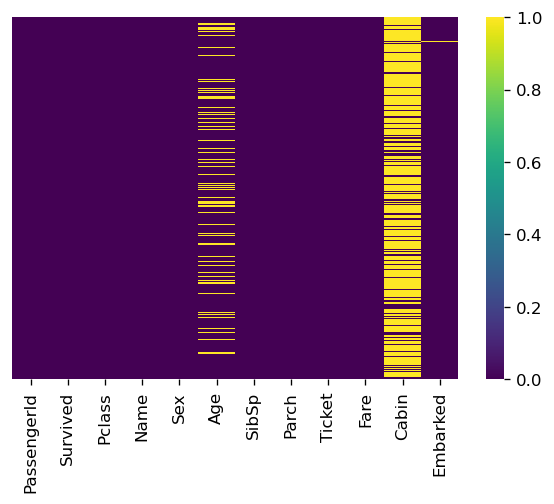

In [37]:
plt.figure(dpi=120)
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')
plt.show()

In [21]:
### yellows are the NaN values

* Approx 20% of age data is missing and around 80-90% of cabin data is not there,we cant make the cabin column to be usefull to us and dropping it will not affect the data

In [22]:
### visulising the number of people survived(1) and those who not survived(0)

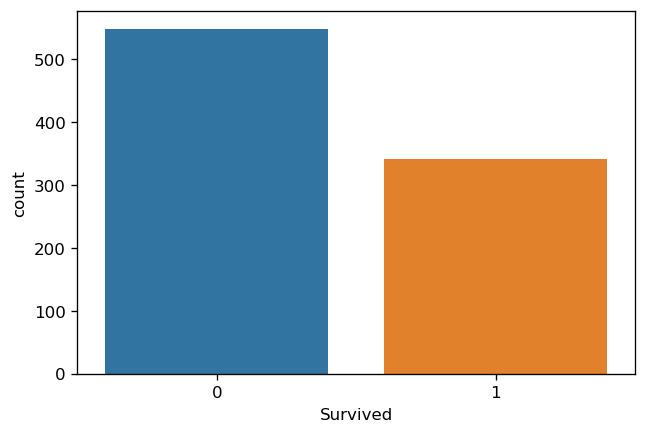

In [24]:
plt.figure(dpi=120)
sns.countplot('Survived',data=data)    # givs the count of 1 and 0 that is survived or not 
plt.show()

* Almost 550 people didnt survived the titanic disaster

In [25]:
### visualising how many men and women survived or not

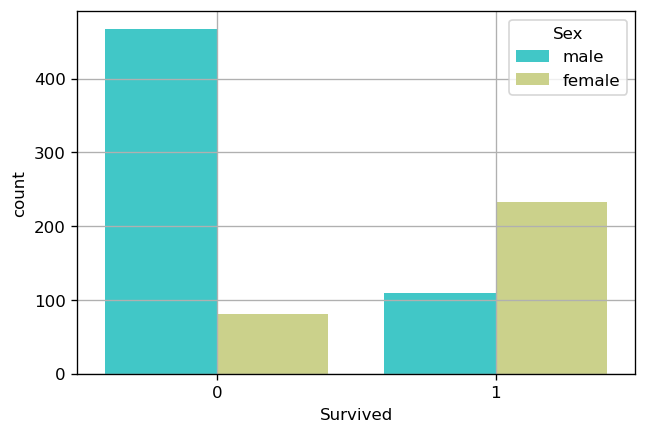

In [28]:
plt.figure(dpi=120)
sns.countplot('Survived',hue='Sex',data=data,palette='rainbow')
plt.grid()
plt.show()

* There were most males who died,less number of women died

In [29]:
### on the basis of passanger class seeing how many survied or died

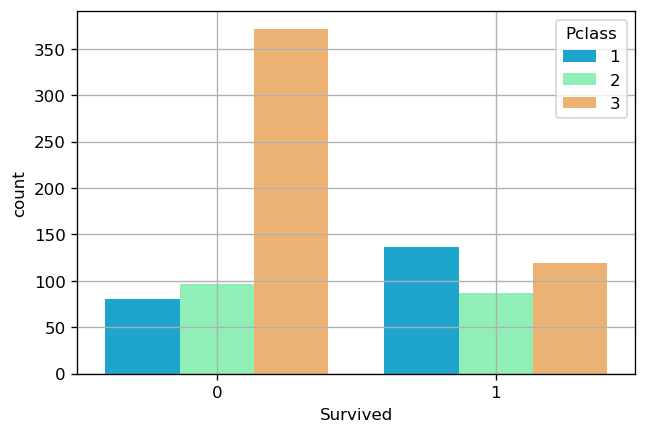

In [32]:
plt.figure(dpi=120)
sns.countplot('Survived',hue='Pclass',data=data,palette='rainbow')
plt.grid()
plt.show()

* Among deaths(0),it mostly comes from passanger who travlled in 3rd class and least from the 1st class.(Leo was present in 3rd class)

In [34]:
### visualising the distribution of age in the dataset using histogram

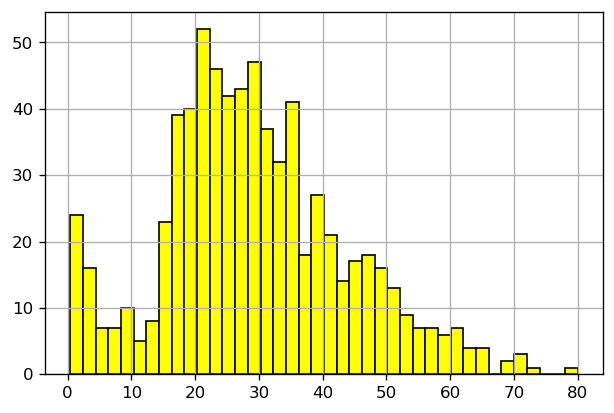

In [36]:
plt.figure(dpi=120)
plt.hist(data['Age'].dropna(),bins=40,color='yellow',ec='black')
plt.grid()
plt.show()

* Majority of people on the ship is of the age range 20 to 35,very less elderly people

In [38]:
### number of people having siblings and spouces with them on the ship.

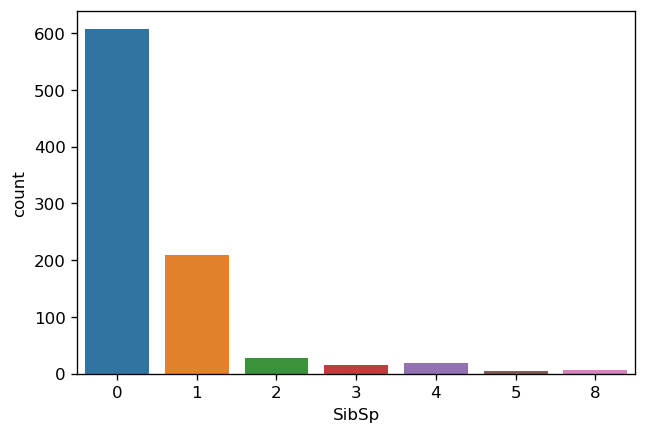

In [39]:
plt.figure(dpi=120)
sns.countplot('SibSp',data=data)
plt.show()

* Most people didnt have spouce and siblings

In [40]:
### distribution of fare

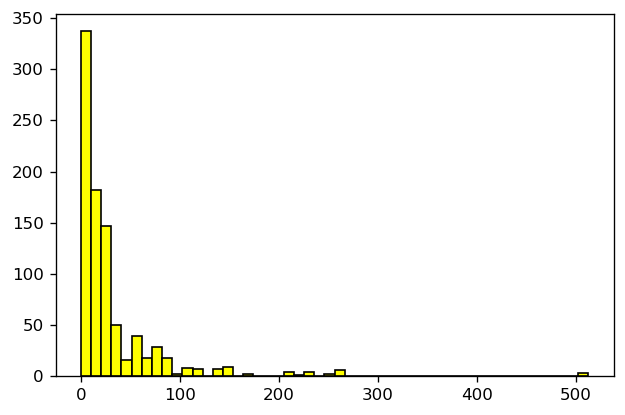

In [41]:
plt.figure(dpi=120)
plt.hist(data['Fare'],bins=50,color='yellow',ec='black')
plt.show()

In [42]:
### using boxplot,seeing the relation between age and pclass,first line oin bplot give 25% then second 50% and then 75%

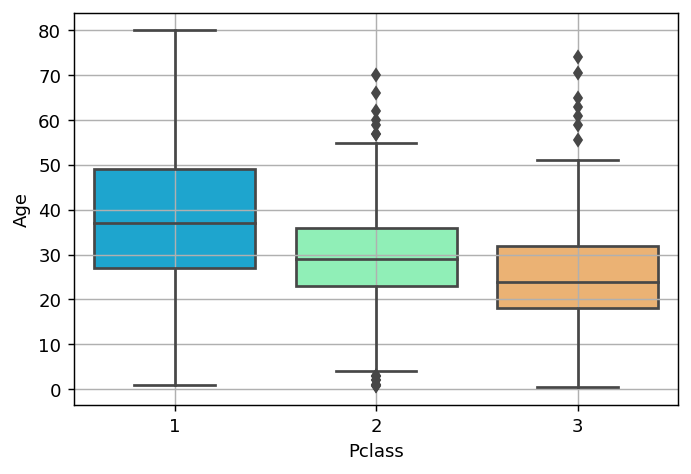

In [46]:
plt.figure(dpi=130)
sns.boxplot(x='Pclass',y='Age',data=data,palette='rainbow')
plt.grid()
plt.show()

* Its clear that avg value of passanger in 1st class in 36-37,29 in 2nd class,23 in 3rd class

In [47]:
### we can replace the NaN value in age of 1st class as 37,2nd class as 29 and 23 in 3rd class

In [48]:
### dropping cabin column as whole

In [49]:
data.drop('Cabin',axis=1,inplace=True)

In [52]:
data.columns    

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

* Cabin column is dropped as it contained majority of NaN values

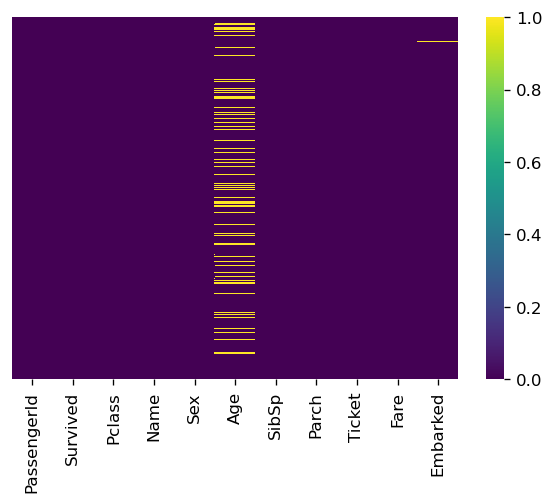

In [56]:
plt.figure(dpi=120)
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')
plt.show()

In [57]:
### dropping all columns containing null values

In [58]:
data.dropna(inplace=True)

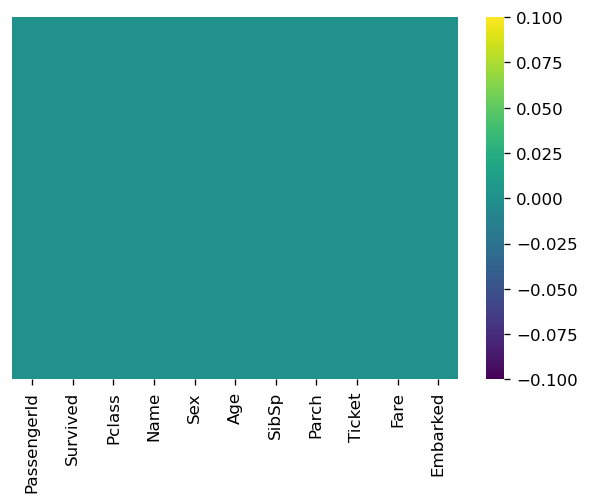

In [59]:
plt.figure(dpi=120)
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')
plt.show()

* Now there is no null values in the dataset

In [60]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,Q
